# Predicting the revenue of the movies based on vote average, budget, popularity, and runtime.

### Introduction

The entertainment industry has always been a profitable field, especially movies. However, with great profit comes great investment. Most modern-day movies require a budget of around 100 million dollars(1). It is crucial for investors/directors to understand the audience’s needs and study market demands. Thus, this project centers around studying the profitability of a movie before it is released, predicting revenues based on several predictors (vote average, budget, popularity, runtime). In this project, regression will take place to better understand/predict the relationship between revenues and different predictors.

The question we will try to answer with our project is what is the revenue of a movie based on vote average, budget, popularity, and runtime. The data set, which consists of 5000 movies from TMDB, will be separated into training and testing sets. Using other predictors (vote average, budget, popularity, runtime), the prediction of test set revenue will be made. 

In the data set “TMDB 5000 Movie Dataset”, revenues, vote average, budget, popularity, runtime are recorded for the 5000 movies listed in an excel format. Other columns are listed/included in the data set as well, however because they are written in json and not a significant predictor to the revenue, those columns will be filtered out. Revenues is defined as the total box income of the movie; vote average is defined as the ratings of the movie, budget is defined as the funding used for the production; Popularity numbers are built according to the TMDB model which consists of number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, Number of users who added it to their "watchlist" for the day, release date, number of total votes, and previous days score.


### Preliminary exploratory data analysis:

In [7]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [22]:
# Getting Dataset from Web
url <- "https://raw.githubusercontent.com/rehan13/DSCI-100-Project-Group25/master/tmdb_5000_movies.csv"
download.file(url, destfile = "Revenue.csv")


In [23]:
# Raw data being read from the web
Revenue_data <- read_csv("Revenue.csv")
Revenue_data

Parsed with column specification:
cols(
  .default = col_character(),
  budget = col_double(),
  id = col_double(),
  popularity = col_double(),
  release_date = col_date(format = ""),
  revenue = col_double(),
  runtime = col_double(),
  vote_average = col_double(),
  vote_count = col_double()
)

See spec(...) for full column specifications.



budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2.37e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.4376,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
3.00e+08,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic island""}, {""id"": 1319, ""name"": ""east india trading company""}, {""id"": 2038, ""name"": ""love of one's life""}, {""id"": 2052, ""name"": ""traitor""}, {""id"": 2580, ""name"": ""shipwreck""}, {""id"": 2660, ""name"": ""strong woman""}, {""id"": 3799, ""name"": ""ship""}, {""id"": 5740, ""name"": ""alliance""}, {""id"": 5941, ""name"": ""calypso""}, {""id"": 6155, ""name"": ""afterlife""}, {""id"": 6211, ""name"": ""fighter""}, {""id"": 12988, ""name"": ""pirate""}, {""id"": 157186, ""name"": ""swashbuckler""}, {""id"": 179430, ""name"": ""aftercreditsstinger""}]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.",139.0826,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": 130}, {""name"": ""Second Mate Productions"", ""id"": 19936}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2.45e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret agent""}, {""id"": 9663, ""name"": ""sequel""}, {""id"": 

In [24]:
# Exploratory Data
Revenue_Data_Particulars <- select(Revenue_data, original_title, vote_average, budget, popularity, runtime, revenue)
Revenue_Data_Particulars

original_title,vote_average,budget,popularity,runtime,revenue
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Avatar,7.2,2.37e+08,150.4376,162,2787965087
Pirates of the Caribbean: At World's End,6.9,3.00e+08,139.0826,169,961000000
Spectre,6.3,2.45e+08,107.3768,148,880674609
⋮,⋮,⋮,⋮,⋮,⋮
"Signed, Sealed, Delivered",7.0,0,1.444476,120,0
Shanghai Calling,5.7,0,0.857008,98,0
My Date with Drew,6.3,0,1.929883,90,0


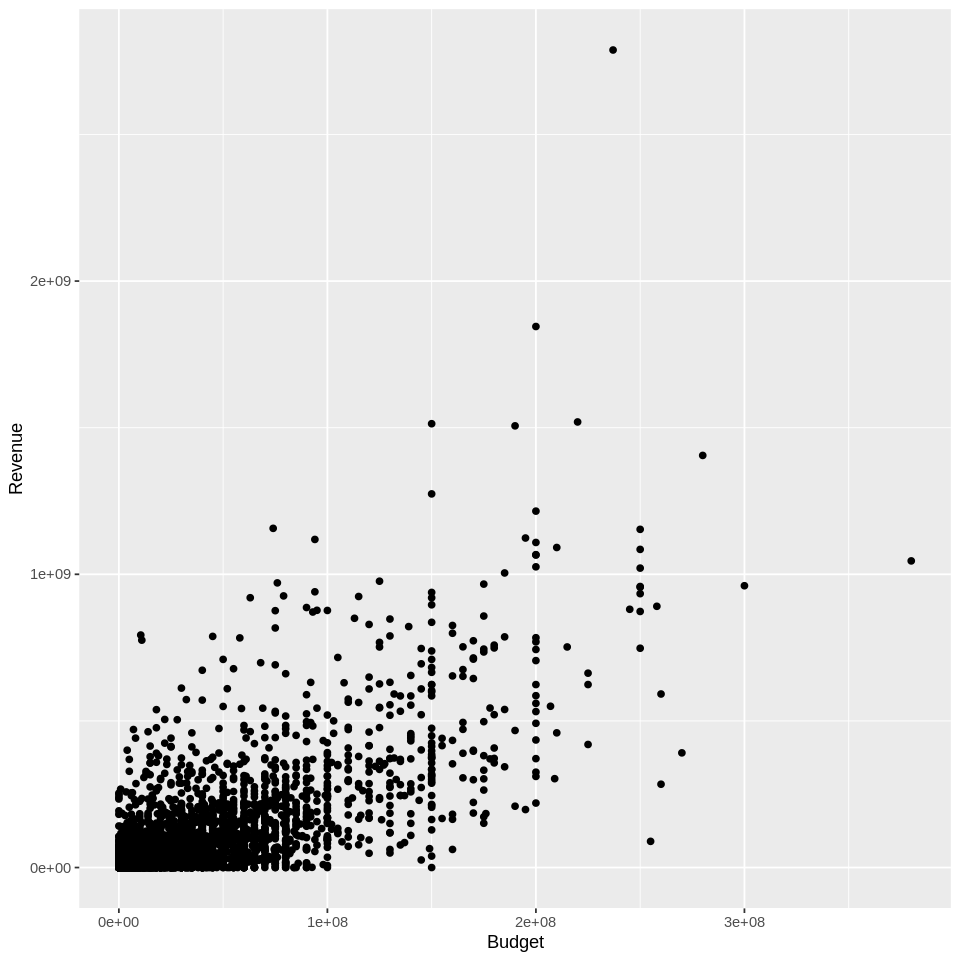

In [25]:
# Relation between Revenue and Budget
options(repr.plot.width = 8, repr.plot.height = 8)
Revenue_and_Budget <- Revenue_Data_Particulars %>%
ggplot(aes(x = budget, y = revenue))+
geom_point() +
labs(x = "Budget", y = "Revenue")
Revenue_and_Budget

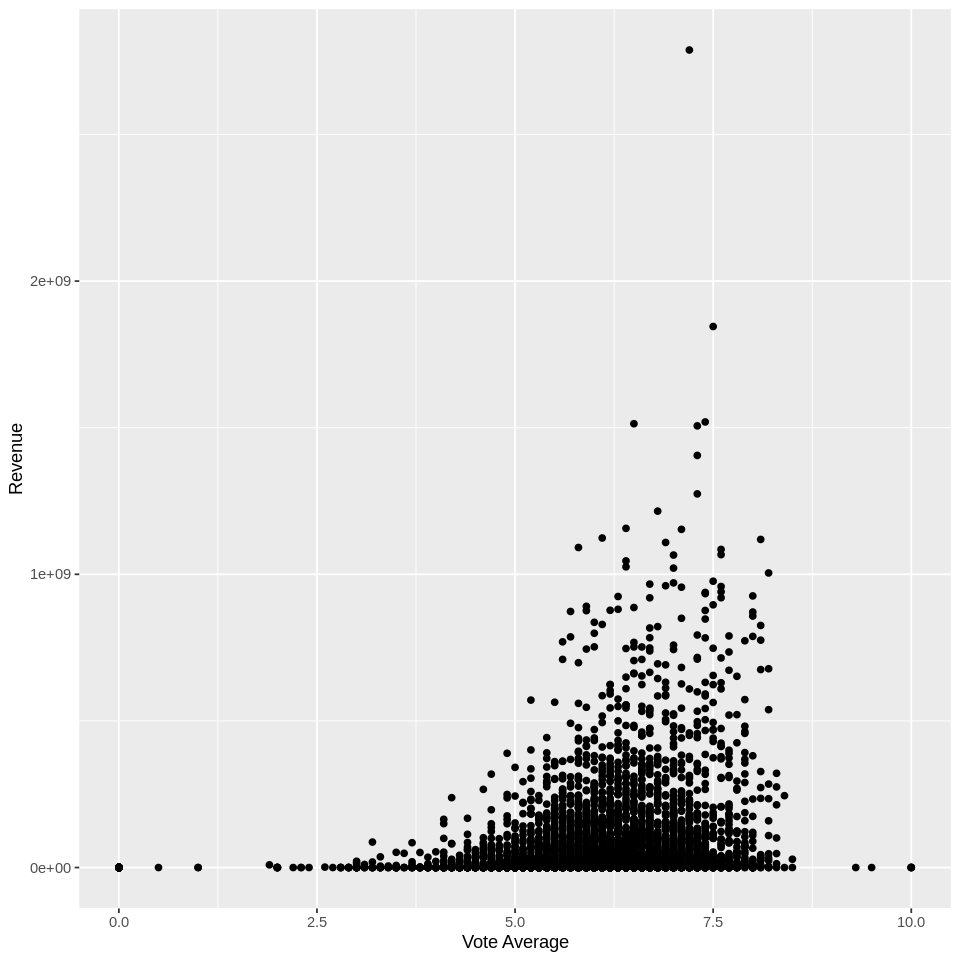

In [26]:
## Relation between Revenue and Vote Average

options(repr.plot.width = 8, repr.plot.height = 8)
Revenue_and_Vote_Average <- Revenue_Data_Particulars %>%
ggplot(aes(x = vote_average, y = revenue))+
geom_point() +
labs(x = "Vote Average", y = "Revenue")
Revenue_and_Vote_Average

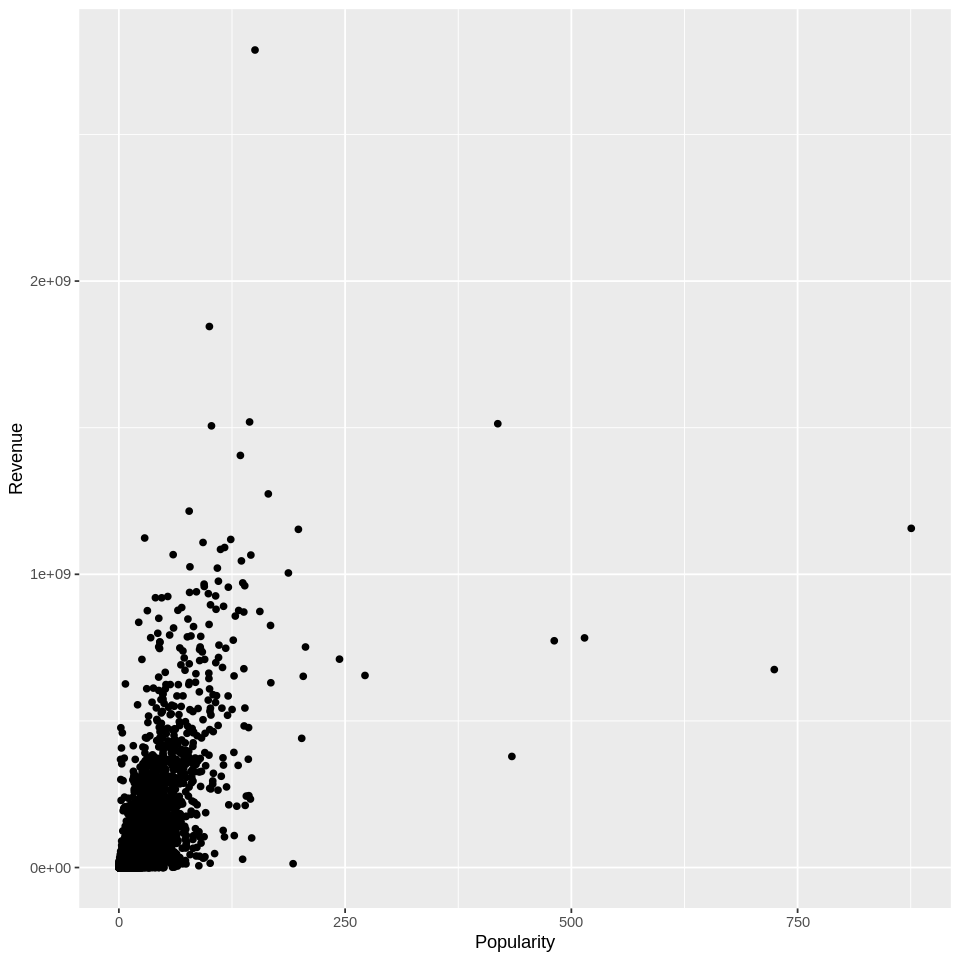

In [27]:
## Relation between Revenue and Popularity

options(repr.plot.width = 8, repr.plot.height = 8)
Revenue_and_Popularity <- Revenue_Data_Particulars %>%
ggplot(aes(x = popularity, y = revenue))+
geom_point() +
labs(x = "Popularity", y = "Revenue")
Revenue_and_Popularity

Warning message:
“Removed 2 rows containing missing values (geom_point).”


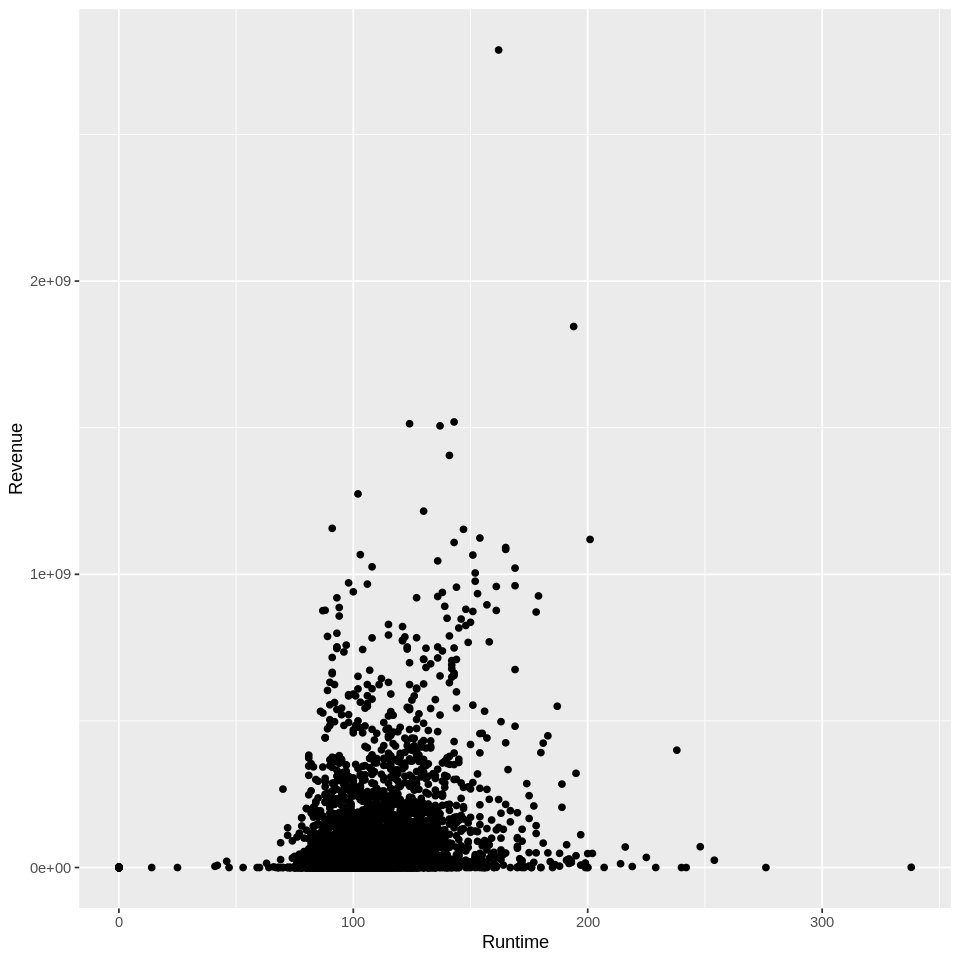

In [28]:
## Relation between Revenue and Runtime

options(repr.plot.width = 8, repr.plot.height = 8)
Revenue_and_Runtime <- Revenue_Data_Particulars %>%
ggplot(aes(x = runtime, y = revenue))+
geom_point() +
labs(x = "Runtime", y = "Revenue")
Revenue_and_Runtime

### Methods:

### Expected outcomes and significance: